In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
from lstm3 import train

from config import filenames, folders

from matplotlib import pyplot as plt

device = 'cuda'

config = {
    'model_name': 'LSTM_3',
    'feature': 'testing-teacher-forcing',
    # 'max_len': 48,
    'max_len': 24,
    'min_freq_src': 6,
    'min_freq_trg': 6,
    
    'src_vocab_size': 21665,
    'trg_vocab_size': 16698,

    # 'embedding_dim': 128,
    # 'hidden_size': 256,
    # 'num_layers': 3,

    'embedding_dim': 64,
    'hidden_size': 128,
    'num_layers': 2,

    'num_epochs': 15,
    'weight_decay': 1e-5,
    'label_smoothing': 0.1,

    'dropout_enc': 0.1,
    'dropout_dec': 0.1,
    'dropout_emb': 0.1,
    'dropout_attention': 0.1,

    'learning_rate': 1e-3,
    'gamma': 0.2,
    'patience': 2,
    'threshold': 5e-4,
    'batch_size': 64
}

def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

In [25]:
from dataset import Vocab
vocab_src = Vocab(filenames['train_src'], min_freq=config['min_freq_src'])
vocab_trg = Vocab(filenames['train_trg'], min_freq=config['min_freq_trg'])

In [28]:
print(len(vocab_src))
print(len(vocab_trg))

21665
16698


In [27]:
from dataset import TranslationDataset
train_dataset = TranslationDataset(vocab_src, 
                                vocab_trg, 
                                filenames['train_src'], 
                                filenames['train_trg'], 
                                max_len=config['max_len'], 
                                device=device)
val_dataset = TranslationDataset(vocab_src, 
                                vocab_trg, 
                                filenames['test_src'], 
                                filenames['test_trg'], 
                                max_len=72, 
                                device=device, 
                                sort_lengths=False)


100%|██████████| 986/986 [00:00<00:00, 6345.98it/s]


LSTM_3(
  (src_embedding): Embedding(21665, 64, padding_idx=1)
  (trg_embedding): Embedding(16698, 64, padding_idx=1)
  (emb_dropout): Dropout(p=0.1, inplace=False)
  (encoder): LSTM(64, 128, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (encoder_output_proj): Linear(in_features=256, out_features=128, bias=True)
  (decoder): LSTM(64, 128, num_layers=2, batch_first=True, dropout=0.1)
  (encoder_hidden_proj): ModuleList(
    (0-1): 2 x Linear(in_features=256, out_features=128, bias=True)
  )
  (encoder_cell_proj): ModuleList(
    (0-1): 2 x Linear(in_features=256, out_features=128, bias=True)
  )
  (fc): Linear(in_features=256, out_features=16698, bias=True)
)


  0%|          | 11/6123 [00:01<11:48,  8.63it/s]


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
autograd::engine::evaluate_function: CudnnRnnBackwar...         2.31%      25.010ms        32.44%     351.378ms       1.273ms       4.676ms         0.38%     221.920ms     804.058us           276  
                                      CudnnRnnBackward0         0.41%       4.473ms        28.92%     313.317ms       1.135ms       1.486ms         0.12%     198.571ms     719.460us           276  
         

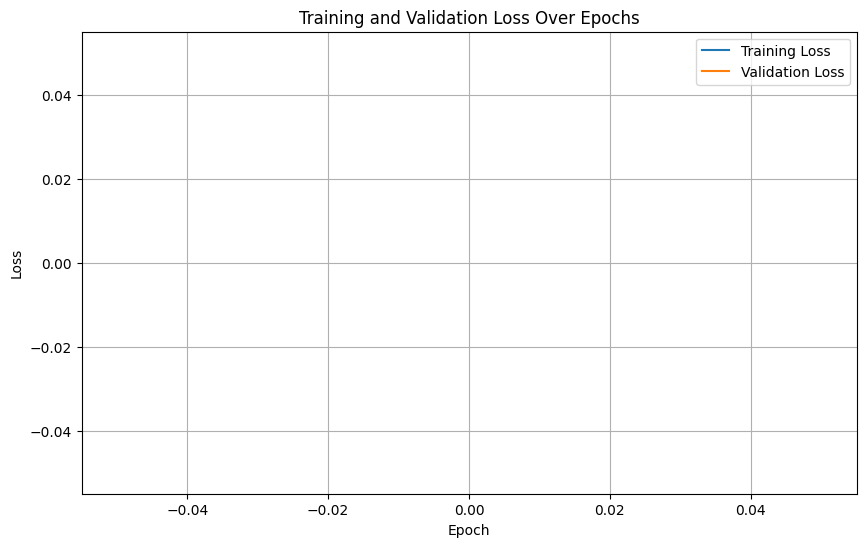

In [36]:
train_losses, val_losses = train(config=config, 
                                 filenames=filenames, 
                                 folders=folders, 
                                 use_wandb=False, 
                                 device=device, 
                                 vocab_src=vocab_src, 
                                 vocab_trg=vocab_trg,
                                 train_dataset=train_dataset,
                                 val_dataset=val_dataset)

plot_losses(train_losses, val_losses)